In [2]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd

In [3]:
one = pd.read_csv('one_stats_new.csv')
ten = pd.read_csv('stats.csv')

In [10]:
# open file with 10 surfaces
with open('stats.csv', 'r') as file_t:
    reader = csv.reader(file_t)
    ten = np.array(list(reader))
    print(ten[0])
    ten = np.delete(ten, 0, axis=0)

# open file with one surface
with open('one_stats.csv', 'r') as file_o:
    reader = csv.reader(file_o)
    one = np.array(list(reader))
    print(one[0])
    one = np.delete(one, 0, axis=0)

['Name' 'FITS' 'HIcont' 'HIcont_p' 'Voxels' 'Image size' 'High/No' 'Tri2'
 'Tri3' 'Tri5' 'Levels' 'RAM' 'RAM_fail']
['Name' 'FITS' 'HIcont' 'HIcont_p' 'Voxels' 'Image size' 'High/No'
 'Levels' 'RAM' 'RAM_fail']


In [11]:
ten = ten[ten[:,-1] != '0.0']
one = one[one[:,-1] != '0.0']

In [12]:
n_ten = ten[:,0]
n_one = one[:,0]
ten = ten[:,1:].astype(float).T
one = one[:,1:].astype(float).T

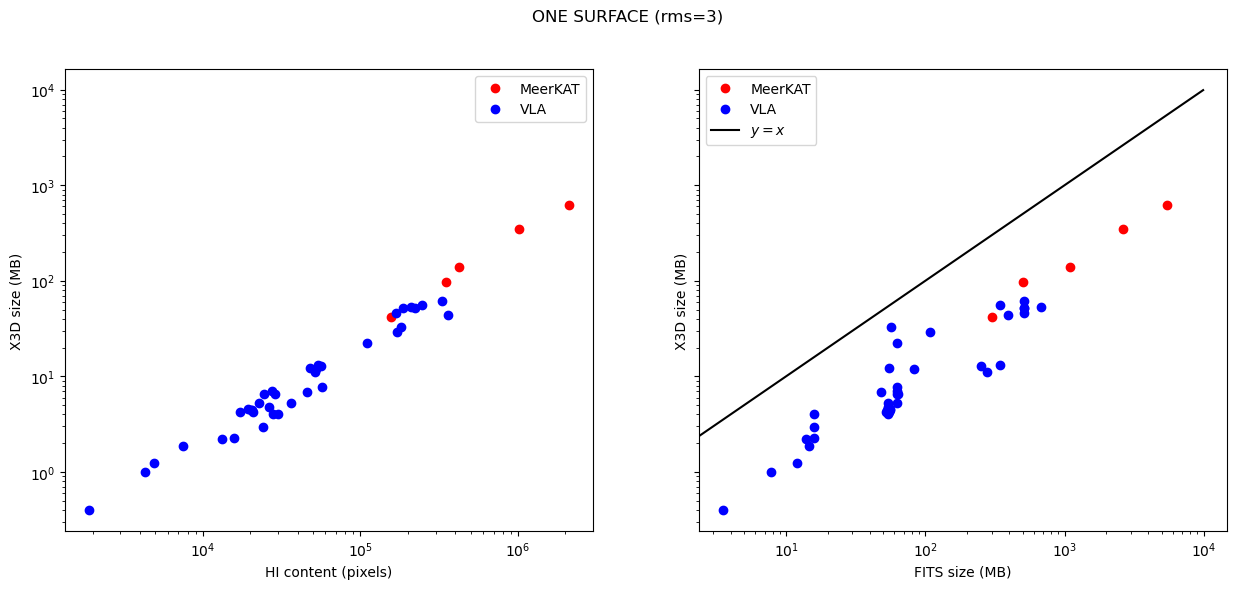

In [5]:
start = 5
fig, ax = plt.subplots(ncols=2, figsize=(15,6), sharey=True)
fig.suptitle('ONE SURFACE (rms=3)')
plt.axes(ax[0])
plt.plot(one['HIcont'][:start], one['High/No'][:start], 'ro', label='MeerKAT')
plt.plot(one['HIcont'][start:], one['High/No'][start:], 'bo', label='VLA')
plt.xlabel('HI content (pixels)')
plt.ylabel('X3D size (MB)')
plt.yscale('log')
plt.xscale('log')
plt.legend();
plt.axes(ax[1])
plt.plot(one['FITS'][:start], one['High/No'][:start], 'ro', label='MeerKAT')
plt.plot(one['FITS'][start:], one['High/No'][start:], 'bo', label='VLA')
plt.plot(np.arange(0,1e4,1e2),np.arange(0,1e4,1e2), 'k', label=r'$y=x$')
plt.xlabel('FITS size (MB)')
plt.ylabel('X3D size (MB)')
plt.xscale('log')
plt.legend();

In [8]:
from scipy.optimize import curve_fit
def func(x, a, b):
    return a * x + b
popt, pcov = curve_fit(func, np.hstack([one[5][np.isnan(one[8])],ten[5][np.isnan(ten[11])]]), np.hstack([one[7][np.isnan(one[8])],ten[10][np.isnan(ten[11])]]))
print(popt)

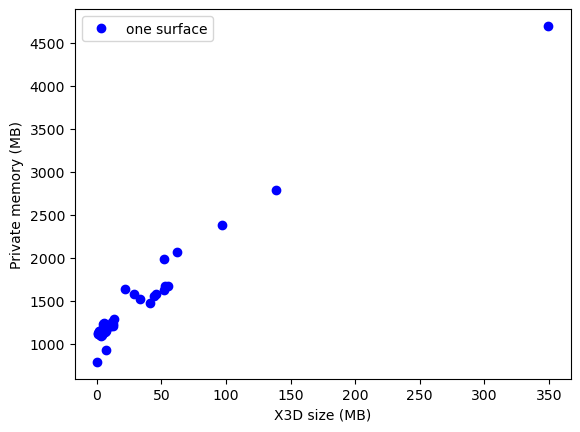

In [14]:
#plt.plot(one[5][~np.isnan(one[8])], one[7][~np.isnan(one[8])], 'ro', label='MeerKAT')
#plt.plot(ten['High/No'][np.isnan(ten[11])], ten[10][np.isnan(ten[11])], 'rs', label='many surfaces')
plt.plot(one['High/No'], one['T_RAM'], 'bo', label='one surface')
#plt.plot(np.arange(0,400),func(np.arange(0,400),popt[0],popt[1]), 'k', label=r'$y=x$')
# for siz in ten[5][~np.isnan(ten[11])]:
#     plt.axvline(x=siz, color='y', linestyle='--')
# for siz in one[5][~np.isnan(one[8])]:
#     plt.axvline(x=siz, color='g', linestyle='--')
# plt.axhline(y=2048,color='y', linestyle='--', label='2GB')
plt.xlabel('X3D size (MB)')
plt.ylabel('Private memory (MB)');
# plt.xscale('log')
# plt.yscale('log')
# plt.ylim(0,2000)
#plt.xlim(0,400)
plt.legend();


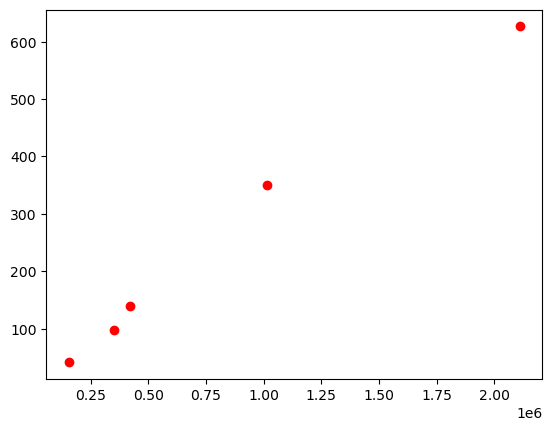

In [15]:
start=5
plt.plot(one['HIcont'][:start], one['High/No'][:start], 'ro', label='MeerKAT');

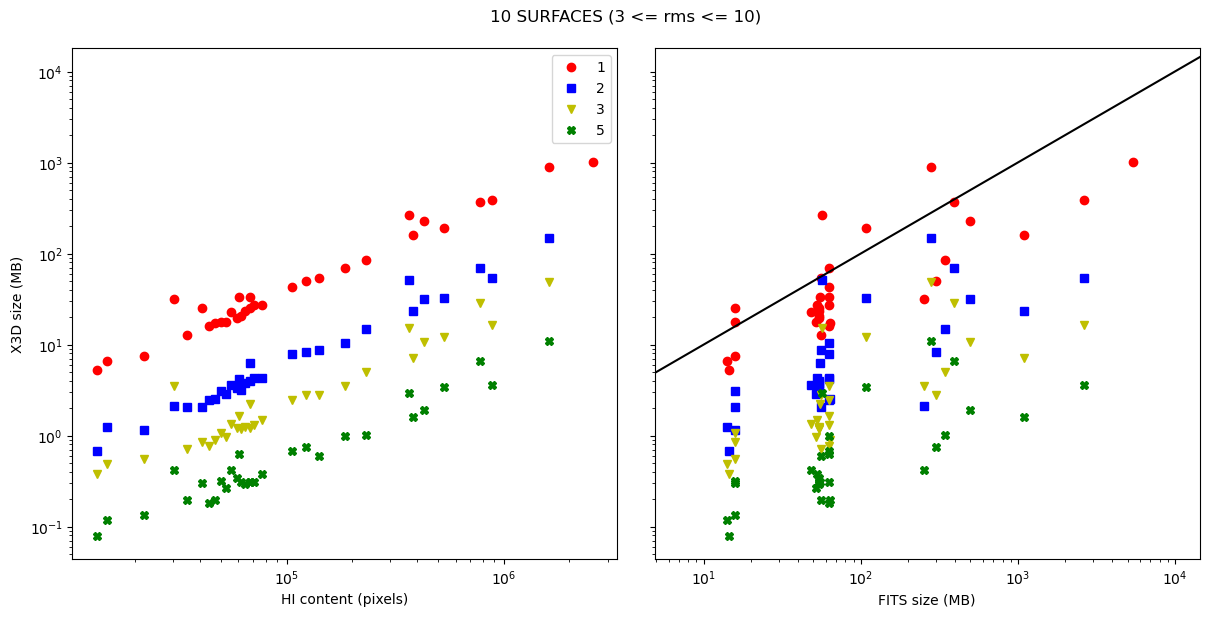

In [51]:
start = 0
fig, ax = plt.subplots(ncols=2, figsize=(12,6), sharey=True)
fig.suptitle('10 SURFACES (3 <= rms <= 10)')
fig.tight_layout()
plt.axes(ax[0])
plt.plot(ten[1][ten[-3]==10][start:], ten[5][ten[-3]==10][start:], 'or', label='1')
plt.plot(ten[1][ten[-3]==10][start:], ten[6][ten[-3]==10][start:], 'sb', label='2')
plt.plot(ten[1][ten[-3]==10][start:], ten[7][ten[-3]==10][start:], 'vy', label='3')
plt.plot(ten[1][ten[-3]==10][start:], ten[8][ten[-3]==10][start:], 'Xg', label='5')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('HI content (pixels)')
plt.ylabel('X3D size (MB)')
plt.axes(ax[1])
plt.plot(ten[0][ten[-3]==10][start:], ten[5][ten[-3]==10][start:], 'or')
plt.plot(ten[0][ten[-3]==10][start:], ten[6][ten[-3]==10][start:], 'sb')
plt.plot(ten[0][ten[-3]==10][start:], ten[7][ten[-3]==10][start:], 'vy')
plt.plot(ten[0][ten[-3]==10][start:], ten[8][ten[-3]==10][start:], 'Xg')
ax[1].axline((7,7), (1e4,1e4), color='k', label=r'$x=y$')
plt.xlabel('FITS size (MB)');
plt.xscale('log')
# plt.ylim(-10,200)
# plt.xlim(-100,550)

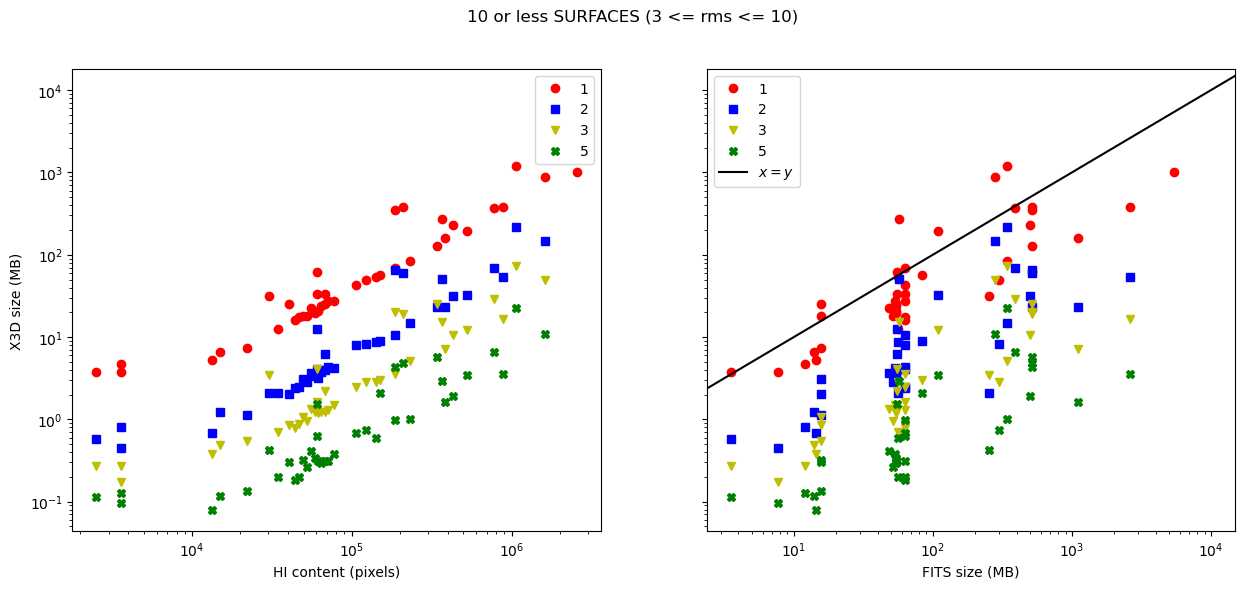

In [56]:
start = 0
fig, ax = plt.subplots(ncols=2, figsize=(15,6), sharey=True)
fig.suptitle('10 or less SURFACES (3 <= rms <= 10) ')
plt.axes(ax[0])
plt.plot(ten[1][start:], ten[5][start:], 'or', label='1')
plt.plot(ten[1][start:], ten[6][start:], 'sb', label='2')
plt.plot(ten[1][start:], ten[7][start:], 'vy', label='3')
plt.plot(ten[1][start:], ten[8][start:], 'Xg', label='5')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('HI content (pixels)')
plt.ylabel('X3D size (MB)')
plt.axes(ax[1])
plt.plot(ten[0][start:], ten[5][start:], 'or', label='1')
plt.plot(ten[0][start:], ten[6][start:], 'sb', label='2')
plt.plot(ten[0][start:], ten[7][start:], 'vy', label='3')
plt.plot(ten[0][start:], ten[8][start:], 'Xg', label='5')
ax[1].axline((7,7), (1e4,1e4), color='k', label=r'$x=y$')
plt.legend()
plt.xlabel('FITS size (MB)');
plt.xscale('log')

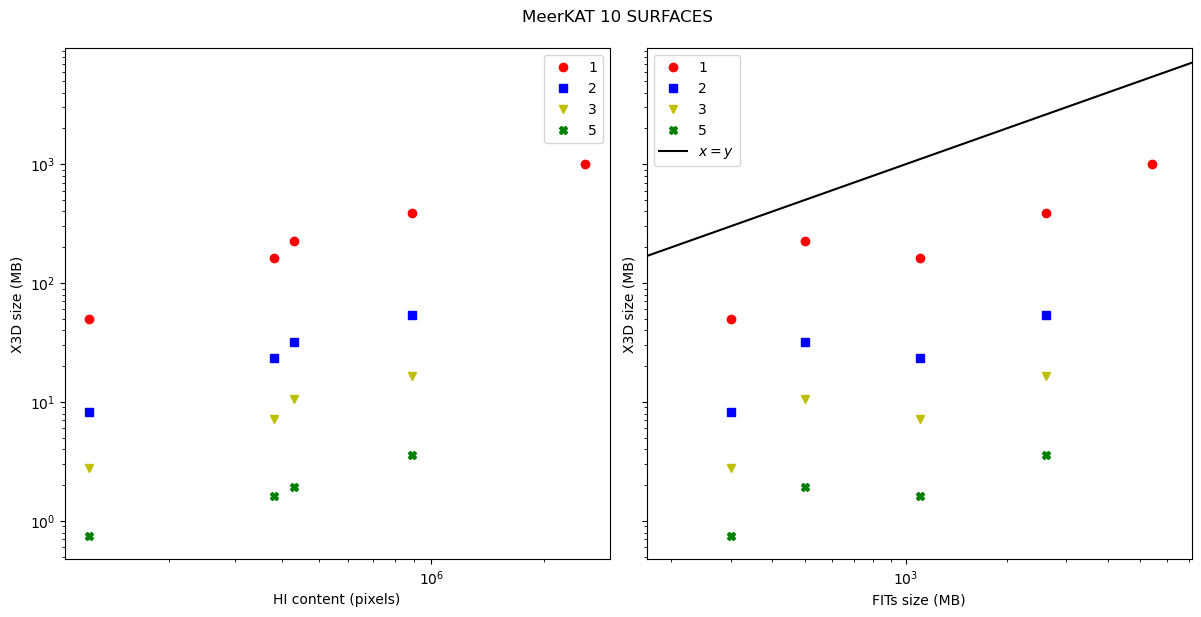

In [64]:
start = 5
fig, ax = plt.subplots(ncols=2, figsize=(12,6), sharey=True)
fig.suptitle('MeerKAT 10 SURFACES')
fig.tight_layout()
plt.axes(ax[0])
plt.plot(ten[1][:start], ten[5][:start], 'or', label='1')
plt.plot(ten[1][:start], ten[6][:start], 'sb', label='2')
plt.plot(ten[1][:start], ten[7][:start], 'vy', label='3')
plt.plot(ten[1][:start], ten[8][:start], 'Xg', label='5')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('HI content (pixels)')
plt.ylabel('X3D size (MB)')
plt.axes(ax[1])
plt.plot(ten[0][:start], ten[5][:start], 'or', label='1')
plt.plot(ten[0][:start], ten[6][:start], 'sb', label='2')
plt.plot(ten[0][:start], ten[7][:start], 'vy', label='3')
plt.plot(ten[0][:start], ten[8][:start], 'Xg', label='5')
ax[1].axline((200,200), (6e3,6e3), color='k', label=r'$x=y$')
plt.xscale('log')
plt.xlabel('FITs size (MB)')
plt.ylabel('X3D size (MB)')
plt.legend();